<a href="https://colab.research.google.com/github/Nomad653/Python/blob/main/Deep%20learning/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Python materialları/Python Week 10/google-data.csv")

In [6]:
X = data.loc[:, ['Date',"Close"]]

In [10]:
X = X.rename(columns={"Date":"ds","Close":"y"})

In [11]:
X

,ds,y
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-07,365.001007
4,2013-01-08,364.280701
...,...,...
1254,2017-12-22,1060.119995
1255,2017-12-26,1056.739990
1256,2017-12-27,1049.369995
1257,2017-12-28,1048.140015


In [14]:
from fbprophet import Prophet


In [20]:
model = Prophet()

In [21]:
model.fit(X)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
future = model.make_future_dataframe(periods=365)


In [23]:
future

,ds
0,2013-01-02
1,2013-01-03
2,2013-01-04
3,2013-01-07
4,2013-01-08
...,...
1619,2018-12-25
1620,2018-12-26
1621,2018-12-27
1622,2018-12-28


In [25]:
forecast = model.predict(future)

In [26]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,369.528525,342.170902,404.019354,369.528525,369.528525,4.198071,4.198071,4.198071,2.846986,2.846986,2.846986,1.351085,1.351085,1.351085,0.0,0.0,0.0,373.726596
1,2013-01-03,369.865620,343.290380,401.920812,369.865620,369.865620,2.542901,2.542901,2.542901,2.062180,2.062180,2.062180,0.480721,0.480721,0.480721,0.0,0.0,0.0,372.408521
2,2013-01-04,370.202714,342.886479,402.233302,370.202714,370.202714,2.131409,2.131409,2.131409,2.481581,2.481581,2.481581,-0.350172,-0.350172,-0.350172,0.0,0.0,0.0,372.334123
3,2013-01-07,371.213999,341.444937,402.955107,371.213999,371.213999,-0.578214,-0.578214,-0.578214,1.945072,1.945072,1.945072,-2.523286,-2.523286,-2.523286,0.0,0.0,0.0,370.635785
4,2013-01-08,371.551094,337.389752,402.747746,371.551094,371.551094,-0.830483,-0.830483,-0.830483,2.290252,2.290252,2.290252,-3.120735,-3.120735,-3.120735,0.0,0.0,0.0,370.720611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,2018-12-25,1282.768488,1153.197663,1419.971042,1144.768666,1405.388826,10.980305,10.980305,10.980305,2.290252,2.290252,2.290252,8.690053,8.690053,8.690053,0.0,0.0,0.0,1293.748793
1620,2018-12-26,1283.441075,1151.114989,1423.618228,1145.143553,1406.451370,10.815606,10.815606,10.815606,2.846986,2.846986,2.846986,7.968620,7.968620,7.968620,0.0,0.0,0.0,1294.256681
1621,2018-12-27,1284.113663,1151.939710,1421.481934,1145.484675,1407.513914,9.243467,9.243467,9.243467,2.062180,2.062180,2.062180,7.181286,7.181286,7.181286,0.0,0.0,0.0,1293.357129
1622,2018-12-28,1284.786250,1150.444257,1425.935521,1145.723782,1408.611430,8.822158,8.822158,8.822158,2.481581,2.481581,2.481581,6.340577,6.340577,6.340577,0.0,0.0,0.0,1293.608408


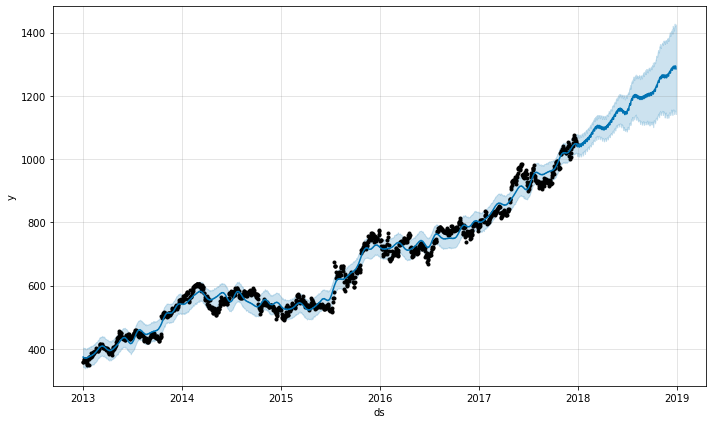

In [27]:
plot = model.plot(forecast)

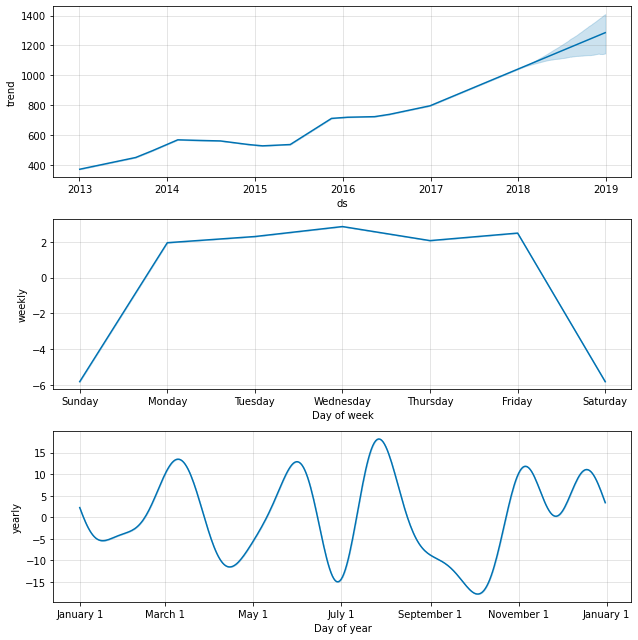

In [28]:
fig2 = model.plot_components(forecast)